<a href="https://colab.research.google.com/github/piyush1856/time-series-and-recommendation-system/blob/main/04_Time_Series_Analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04.Time Series Analysis - 3

In [ ]:
train_x.tail()

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


<Axes: xlabel='DATE'>

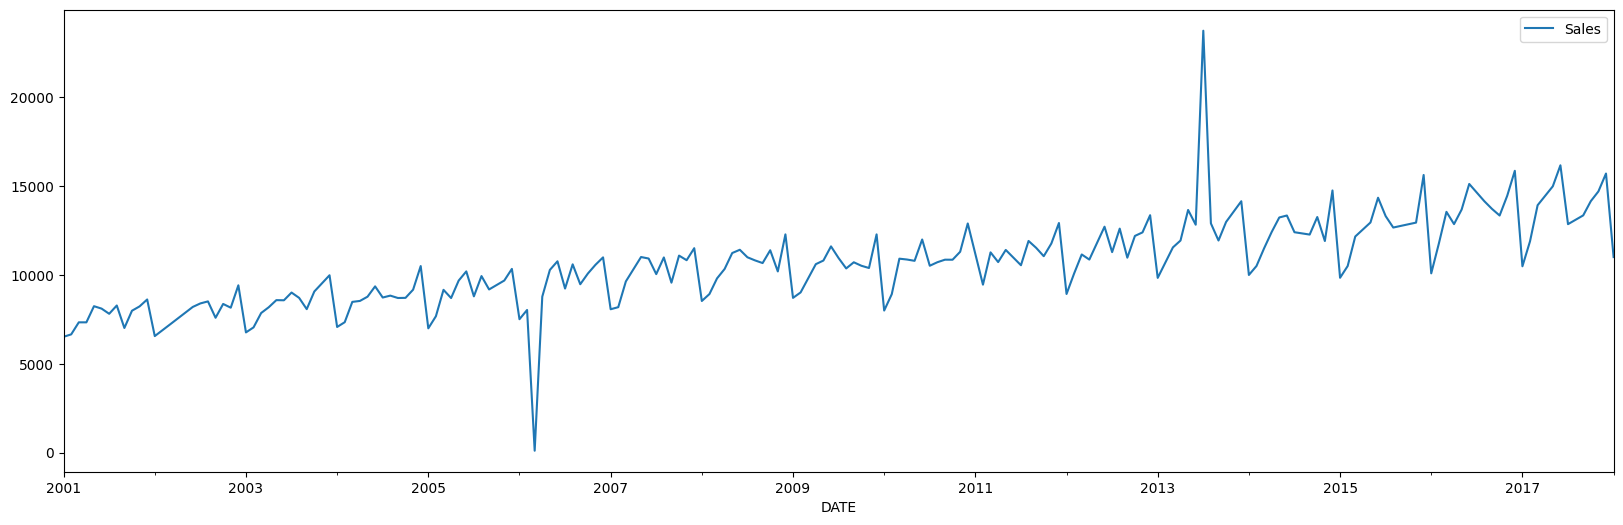

In [ ]:
train_x.plot()

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

adf_test(train_x.Sales)

Sequence is not stationary


In [ ]:
train_x_st = train_x.diff(1)
train_x_st.dropna(inplace=True)

In [ ]:
train_x_st.head()

,Sales
DATE,
2001-02-01,135.0
2001-03-01,678.0
2001-04-01,0.0
2001-05-01,908.0
2001-06-01,-136.0


In [ ]:
adf_test(train_x_st.Sales)

Sequence is stationary


<Axes: xlabel='DATE'>

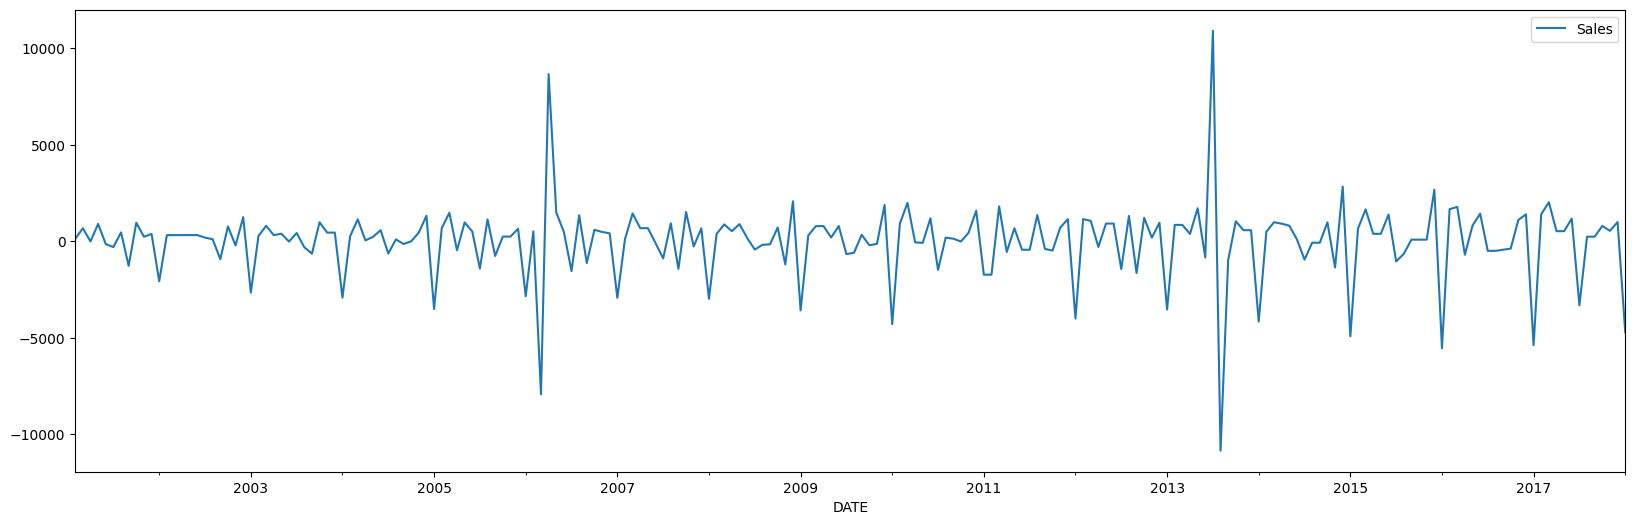

In [ ]:
train_x_st.plot()

In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

### AR Model

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(6, 0, 0))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,pred
DATE,
2018-02-01,2025.118408
2018-03-01,259.152692
2018-04-01,435.617842
2018-05-01,-6.664428
2018-06-01,9.086154
2018-07-01,-442.702447
2018-08-01,-86.211930
2018-09-01,166.769875
2018-10-01,111.351732


In [ ]:
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

<ipython-input-160-774d71a9238a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MAE : 1582.768
RMSE : 1814.138
MAPE: 0.105


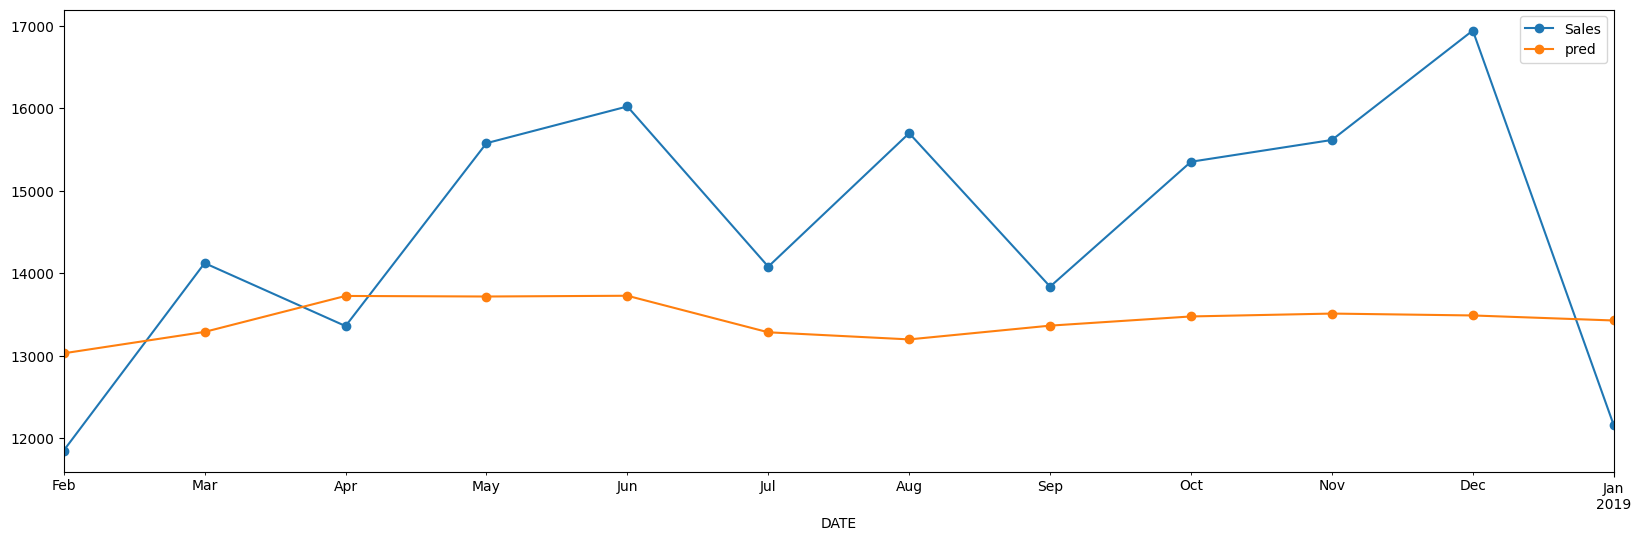

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### MA Model

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(0, 0, 6))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,pred
DATE,
2018-02-01,2268.855046
2018-03-01,257.575487
2018-04-01,400.907157
2018-05-01,-11.349091
2018-06-01,152.877056
2018-07-01,-320.756530
2018-08-01,0.000000
2018-09-01,0.000000
2018-10-01,0.000000


In [ ]:
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

<ipython-input-169-774d71a9238a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MAE : 1398.697
RMSE : 1628.98
MAPE: 0.094


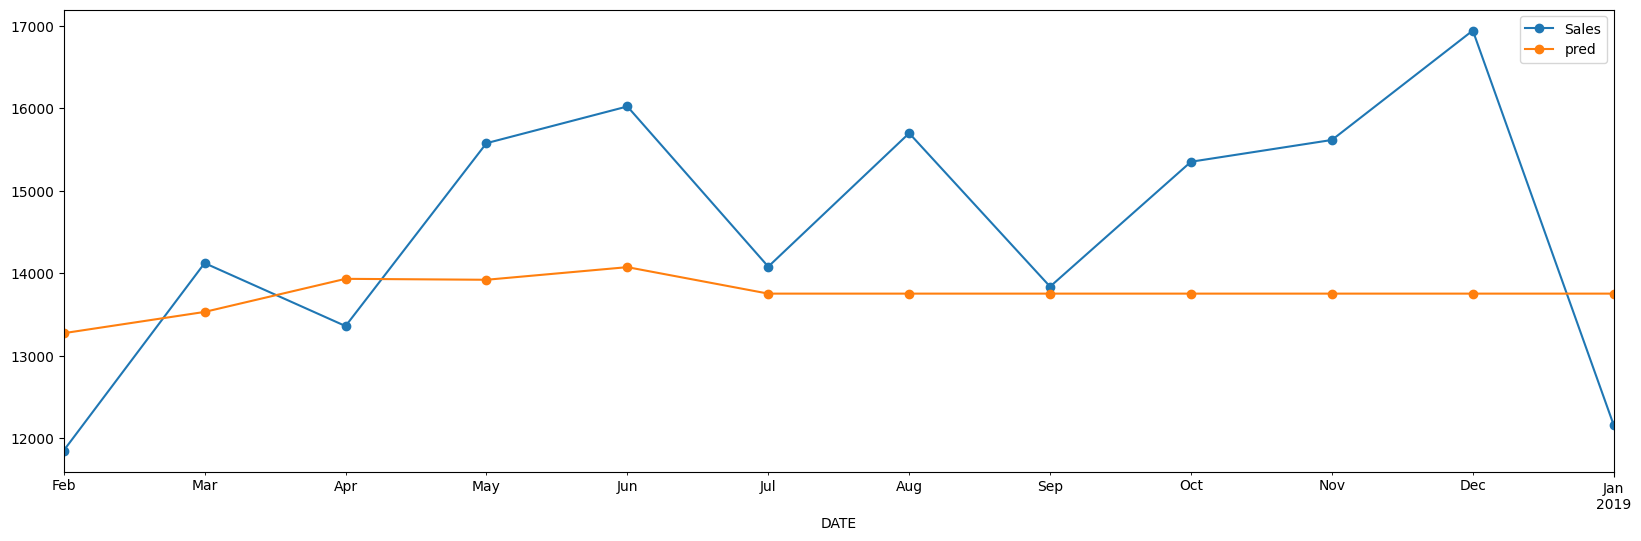

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### ARMA Model

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(5, 0, 5))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

,pred
DATE,
2018-02-01,2779.123407
2018-03-01,-23.118317
2018-04-01,645.130708
2018-05-01,-427.183525
2018-06-01,362.176469
2018-07-01,-318.485354
2018-08-01,535.259214
2018-09-01,-503.477853
2018-10-01,435.506443


In [ ]:
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

<ipython-input-181-774d71a9238a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MAE : 1214.566
RMSE : 1402.025
MAPE: 0.084


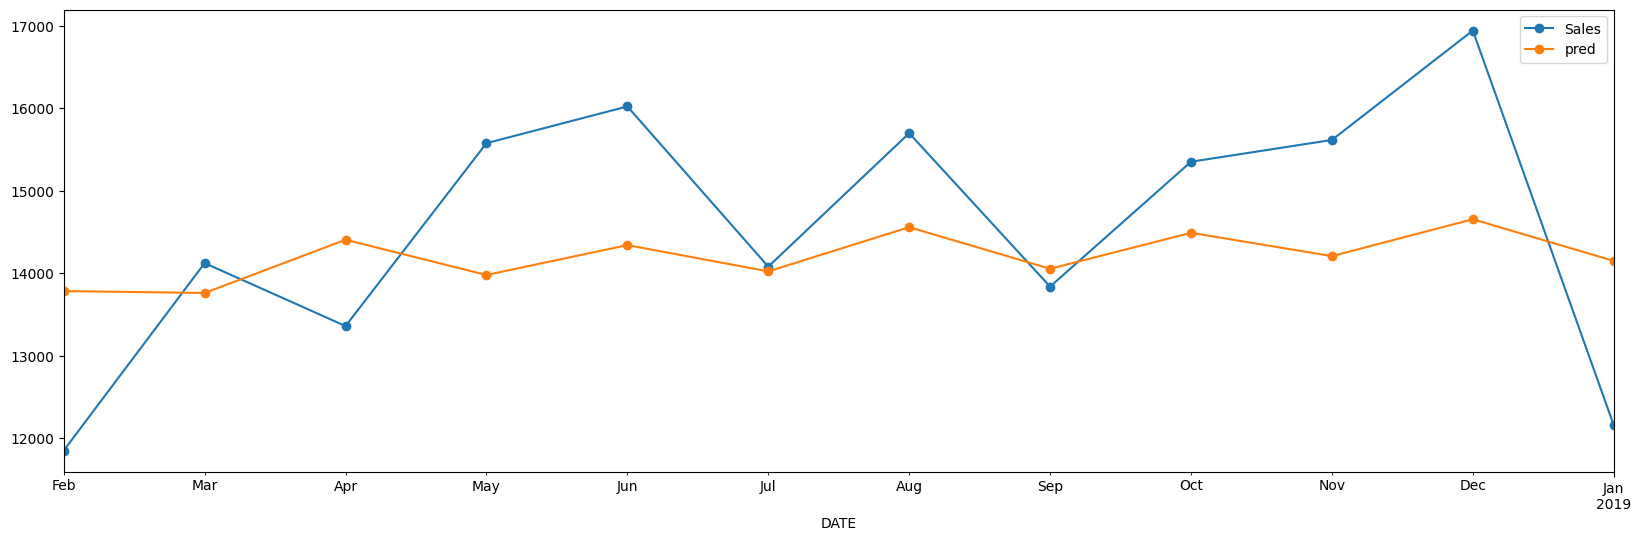

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

MAE : 1188.756
RMSE : 1353.856
MAPE: 0.082


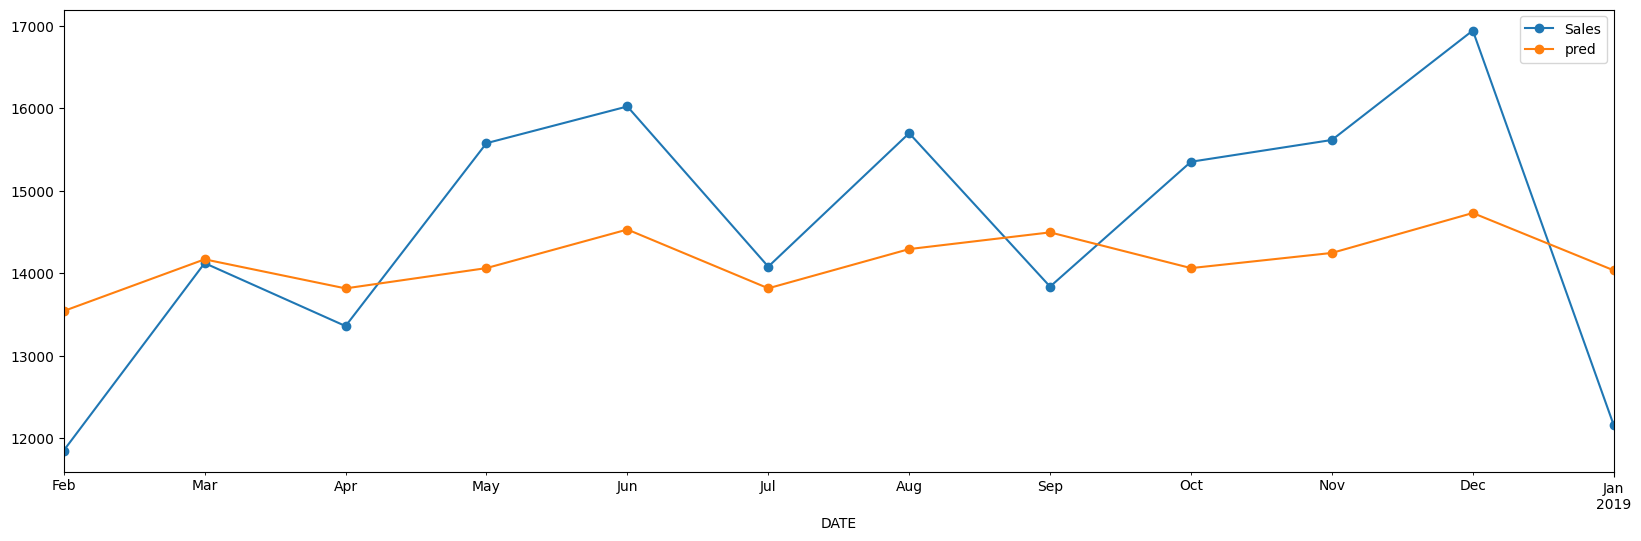

In [ ]:
model = SARIMAX(train_x.Sales, order=(5, 1, 5))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 672.239
RMSE : 742.186
MAPE: 0.046


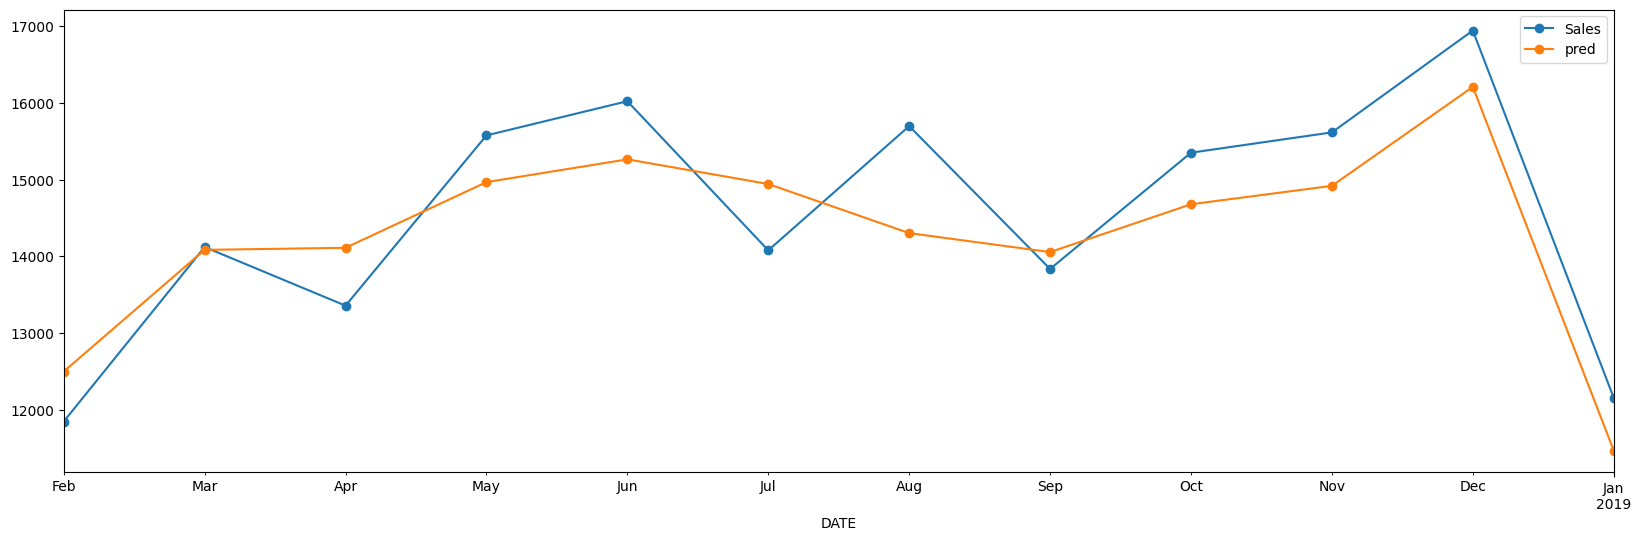

In [ ]:
model = SARIMAX(train_x.Sales, order=(7, 1, 7), seasonal_order=(2,1,2,12))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])